In [106]:
import pandas as pd
import librosa
from pathlib import Path
import torchaudio
import matplotlib.pyplot as plt
import IPython.display as ipd

In [25]:
ROOT    = Path("cv-corpus-18.0-delta-2024-06-14-th")
CLIPS   = ROOT / "clips"

def read_wav(path):
    
    pass

In [11]:
df = pd.read_csv("cv-corpus-18.0-delta-2024-06-14-th/cv-corpus-18.0-delta-2024-06-14/th/other.tsv", sep='\t')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        613 non-null    object 
 1   path             613 non-null    object 
 2   sentence_id      613 non-null    object 
 3   sentence         613 non-null    object 
 4   sentence_domain  0 non-null      float64
 5   up_votes         613 non-null    int64  
 6   down_votes       613 non-null    int64  
 7   age              382 non-null    object 
 8   gender           362 non-null    object 
 9   accents          0 non-null      float64
 10  variant          0 non-null      float64
 11  locale           613 non-null    object 
 12  segment          0 non-null      float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [41]:
path = "cv-corpus-18.0-delta-2024-06-14-th/cv-corpus-18.0-delta-2024-06-14/th/clips/common_voice_th_40196204.mp3"

wav = torchaudio.load(path)

In [42]:
wav

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.2562e-05,
           8.4647e-05, -1.9305e-04]]),
 32000)

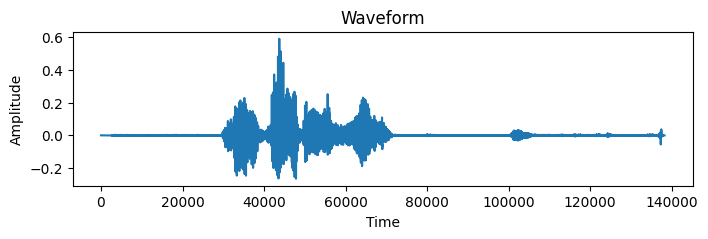

In [43]:
plt.figure(figsize=(8,2))
plt.title("Waveform")
plt.plot(wav[0].squeeze(0).detach().cpu().numpy())
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [50]:
spec_transform  = torchaudio.transforms.MelSpectrogram(
    n_fft=2048,
    win_length=2048//2,
    hop_length=2048//8,
    power=2
)

In [51]:
wav_mel = spec_transform(wav[0])

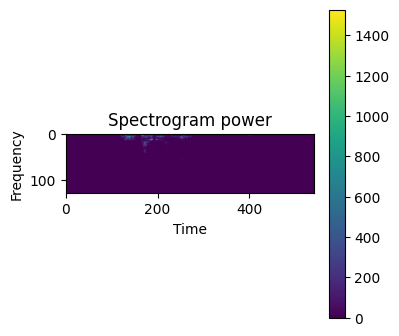

In [52]:
fig, (ax1) = plt.subplots(figsize=(4, 4), ncols=1)

_ = ax1.set_title("Spectrogram power")
pos = ax1.imshow(wav_mel.squeeze(0).detach().cpu().numpy())
_ = fig.colorbar(pos, ax=ax1)

_ = ax1.set_xlabel("Time")
_ = ax1.set_ylabel("Frequency")

In [103]:
import math

def pow_mel_to_db(x):
    x = x[0]
    mel_spec = torchaudio.functional.amplitude_to_DB(
        x,
        multiplier = 10, 
        amin = 1e-10, 
        db_multiplier = math.log10(max(1e-10, x.max())),
        top_db = 80
    )
    
    mel_spec = mel_spec/10
    
    
    return mel_spec
    

In [104]:
db_mel_spec = pow_mel_to_db(wav_mel)

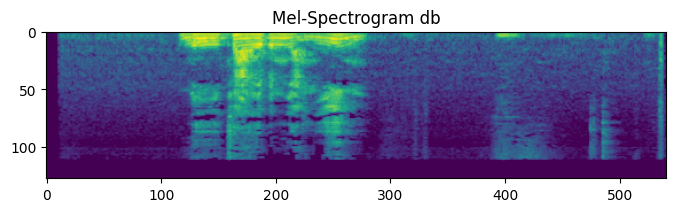

In [105]:
fig, (ax1) = plt.subplots(figsize=(8, 3), ncols=1)
_ = ax1.set_title("Mel-Spectrogram db")
pos = ax1.imshow(db_mel_spec.squeeze())
plt.show()

In [113]:
ipd.Audio(wav[0].squeeze(0).detach().cpu().numpy(), rate=32000)

In [114]:
wav[0].shape

torch.Size([1, 138240])